# EDA

#### 240923_rockhead_shift_coordinate_.csv

## columns info

|column name|Description|test input|
|---|---|---|
|borehole_code|시추공 코드|X|
|x|위도|O|
|y|경도|O|
|Elevation|표고|O|
|depth_start|rockhead 시작 심도|output|
|depth_end|rockhead 종료 심도|X|
|Ground name|지반명- WR: 풍화암, SR: 연암, MR: 보통암, HR: 경암|X|
|Density|1km^2당 시추공 밀도|O|
|Slope|경사|O|
|Aspect|경사방향|O|
|DEM|DEM|O|
|Rock Type|지질도에 따른 rock type|O|

* Rock type{0:화성암, 1:퇴적암, 2:변성암}

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#data load
csv = pd.read_csv('data/240923_rockhead_shift_coordinate_.csv')
df = pd.DataFrame(csv)

## Data check
- info
- distribution

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16603 entries, 0 to 16602
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed__0     16603 non-null  int64  
 1   borehole_code  16603 non-null  int64  
 2   x              16603 non-null  float64
 3   y              16603 non-null  float64
 4   elevation      16603 non-null  float64
 5   depth_start    16603 non-null  float64
 6   depth_end      16603 non-null  float64
 7   Ground_name    16603 non-null  object 
 8   Density        16603 non-null  float64
 9   Slope          16603 non-null  float64
 10  Aspect         16603 non-null  float64
 11  DEM            16603 non-null  float64
 12  Rock type      16117 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 1.6+ MB


In [4]:
# categorical data

# rock type data nan -> missing
df['Rock type'].fillna('missing', inplace=True)

df['Ground_name'] = df['Ground_name'].astype('category')
df['Rock type'] = df['Rock type'].astype('category')

print(df['Ground_name'].unique())
print(df['Rock type'].unique())

['WR', 'SR', 'MR', 'HR']
Categories (4, object): ['HR', 'MR', 'SR', 'WR']
[0.0, 1.0, 2.0, 'missing']
Categories (4, object): [0.0, 1.0, 2.0, 'missing']


C:\Users\user\AppData\Local\Temp\ipykernel_48340\541445897.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rock type'].fillna('missing', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_48340\541445897.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Rock type'].fillna('missing', inplace=True)


In [5]:
# error값 
df['depth_fault'] = df['depth_start'] > df['depth_end']
df['depth_fault'].value_counts()

depth_fault
False    16603
Name: count, dtype: int64

In [6]:
# drop
df.drop(['depth_fault'], axis=1, inplace=True)
df.drop(['Unnamed__0'], axis=1, inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16603 entries, 0 to 16602
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   borehole_code  16603 non-null  int64   
 1   x              16603 non-null  float64 
 2   y              16603 non-null  float64 
 3   elevation      16603 non-null  float64 
 4   depth_start    16603 non-null  float64 
 5   depth_end      16603 non-null  float64 
 6   Ground_name    16603 non-null  category
 7   Density        16603 non-null  float64 
 8   Slope          16603 non-null  float64 
 9   Aspect         16603 non-null  float64 
 10  DEM            16603 non-null  float64 
 11  Rock type      16603 non-null  category
dtypes: category(2), float64(9), int64(1)
memory usage: 1.3 MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
borehole_code,16603.0,6.013565e+06,683661.944274,5.001001e+06,5.421020e+06,5.884002e+06,6.590503e+06,7.294011e+06
x,16603.0,1.988957e+05,7574.568071,1.810222e+05,1.927959e+05,2.006150e+05,2.043190e+05,2.151602e+05
y,16603.0,5.499935e+05,5415.064450,5.369002e+05,5.455730e+05,5.497710e+05,5.531314e+05,5.657695e+05
elevation,16603.0,3.920554e+01,40.220426,0.000000e+00,9.800000e+00,2.412000e+01,5.490000e+01,2.120000e+02
depth_start,16603.0,9.926148e+00,7.019583,0.000000e+00,4.300000e+00,9.000000e+00,1.450000e+01,6.450000e+01
depth_end,16603.0,1.480771e+01,8.693816,3.000000e-01,7.900000e+00,1.400000e+01,2.000000e+01,7.200000e+01
Density,16603.0,6.138930e-05,0.000035,3.000000e-07,3.590000e-05,5.480000e-05,8.165000e-05,1.621000e-04
Slope,16603.0,-1.176340e-02,0.058884,-5.328608e-01,-3.162320e-02,-6.735600e-03,8.163800e-03,4.660273e-01
Aspect,16603.0,1.796542e+02,104.475196,3.381760e-02,8.950721e+01,1.823893e+02,2.715327e+02,3.599887e+02
DEM,16603.0,3.022567e+01,23.975218,2.724235e+00,1.456235e+01,2.262966e+01,3.710671e+01,3.103913e+02


In [9]:
df.describe(include=['category']).T

,count,unique,top,freq
Ground_name,16603,4,WR,13803
Rock type,16603.0,4.0,2.0,10048.0


## Data Visualization

In [10]:
import utils.eda_utils as eda_utils 

In [11]:
df_v = df.copy()

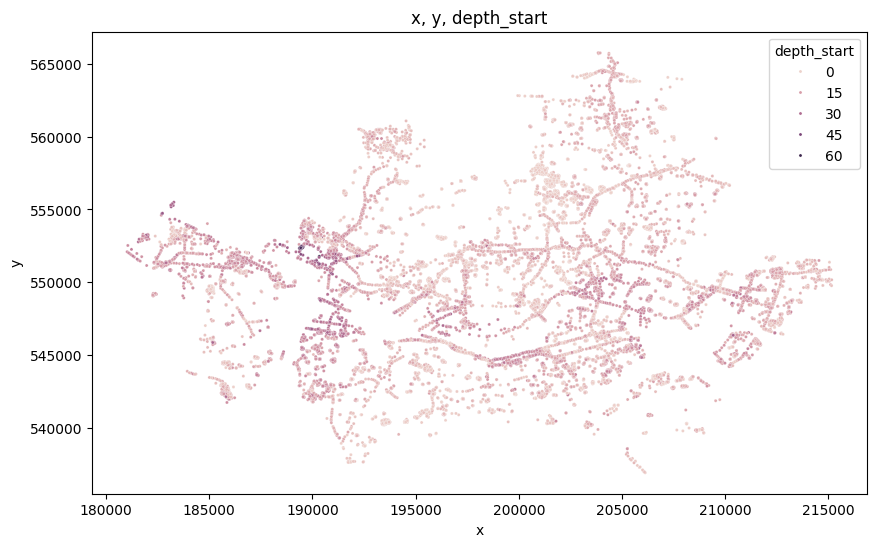

In [12]:
eda_utils.scatter_relation(df_v, 'x', 'y', 5, 'x, y, depth_start','depth_start')

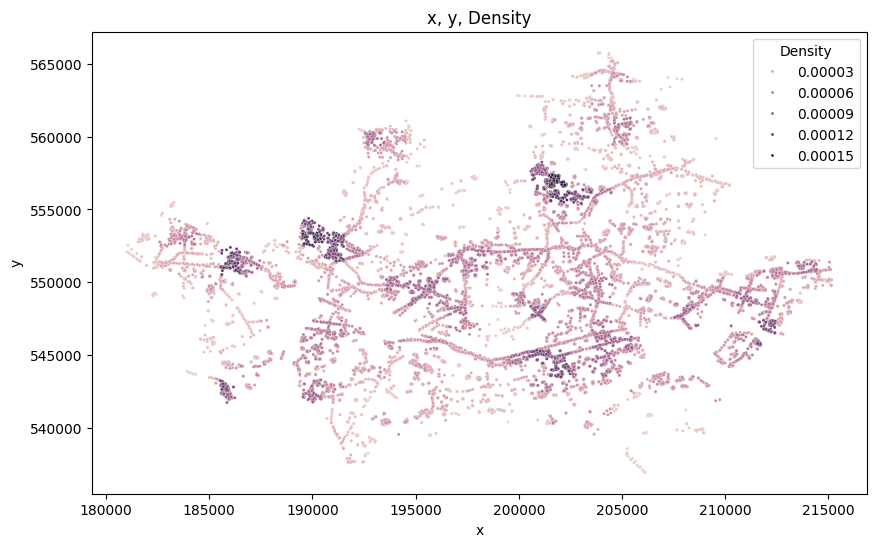

In [13]:
eda_utils.scatter_relation(df_v, 'x', 'y', 5, 'x, y, Density','Density')

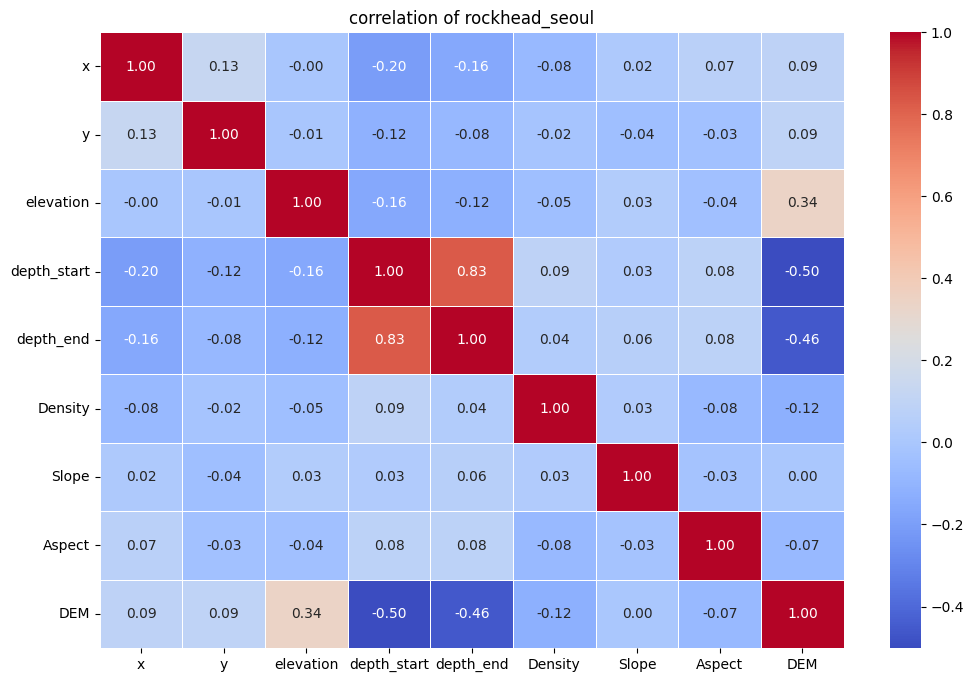

In [14]:
eda_utils.correlation_matrix(df_v, 'correlation of rockhead_seoul', drop_column='borehole_code')

- depth_end 제거 필요

<Figure size 1000x1000 with 0 Axes>

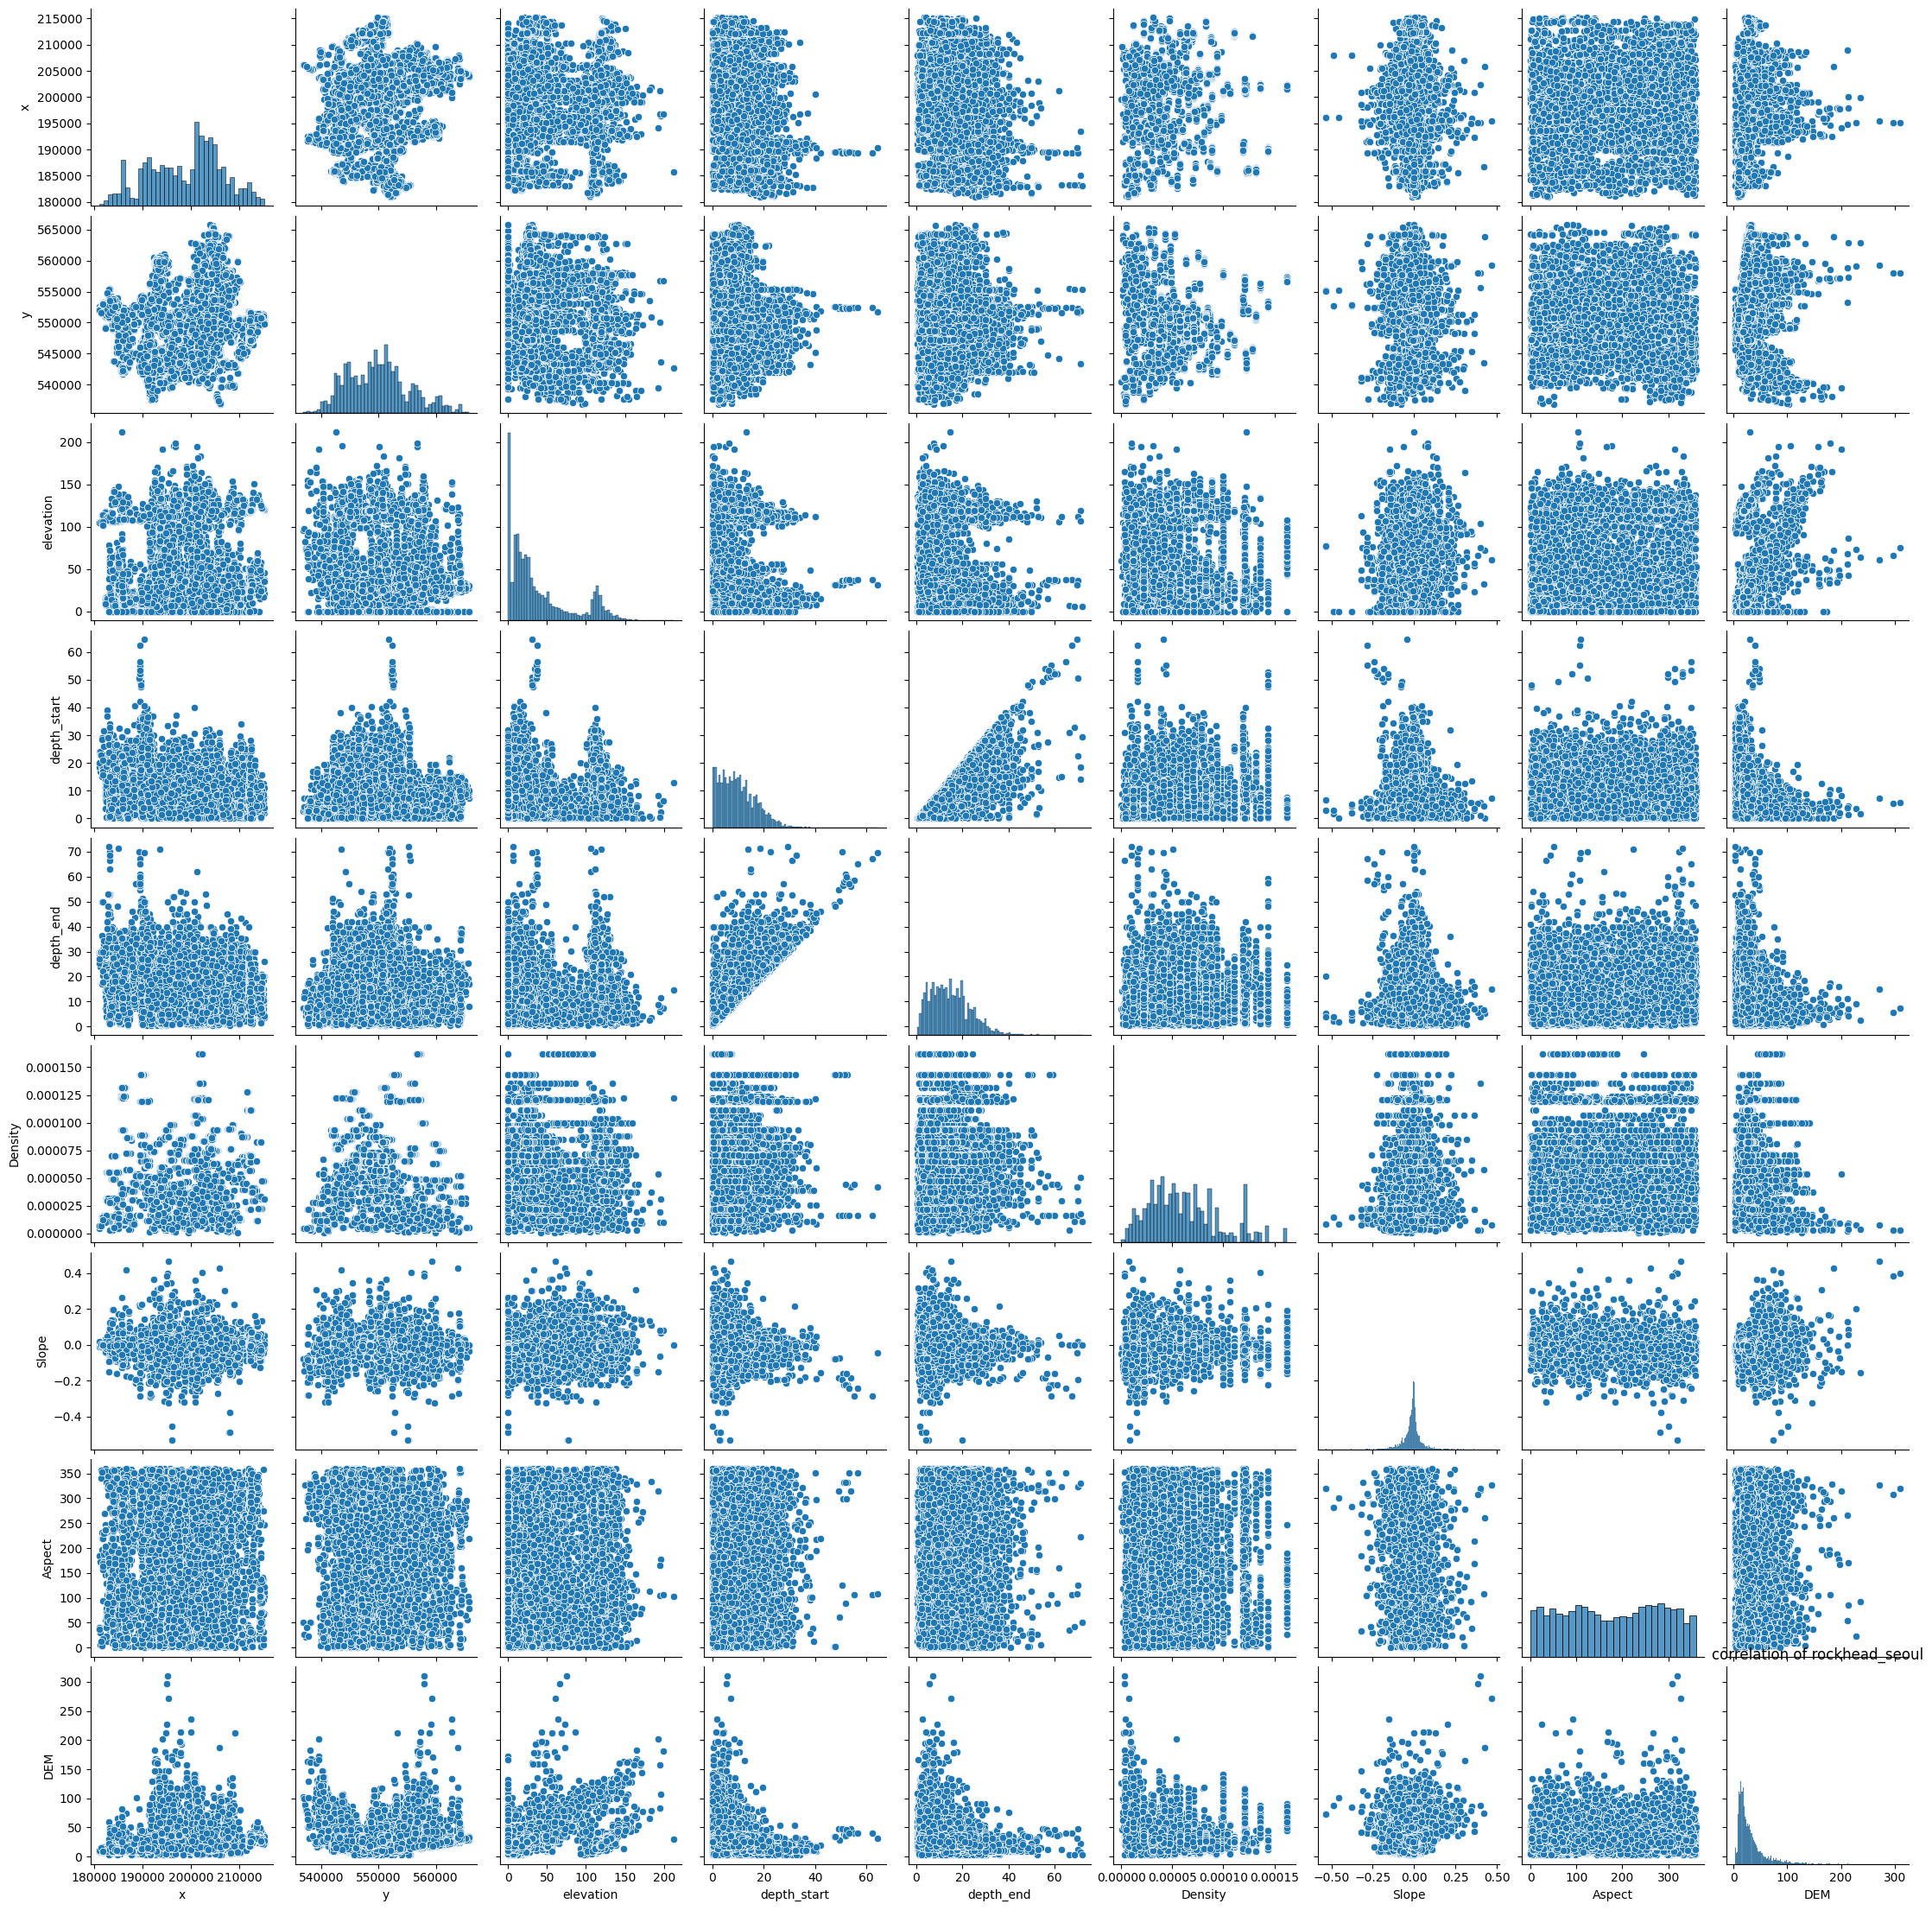

In [15]:
eda_utils.pairplot(df_v, 'correlation of rockhead_seoul', drop_column='borehole_code')

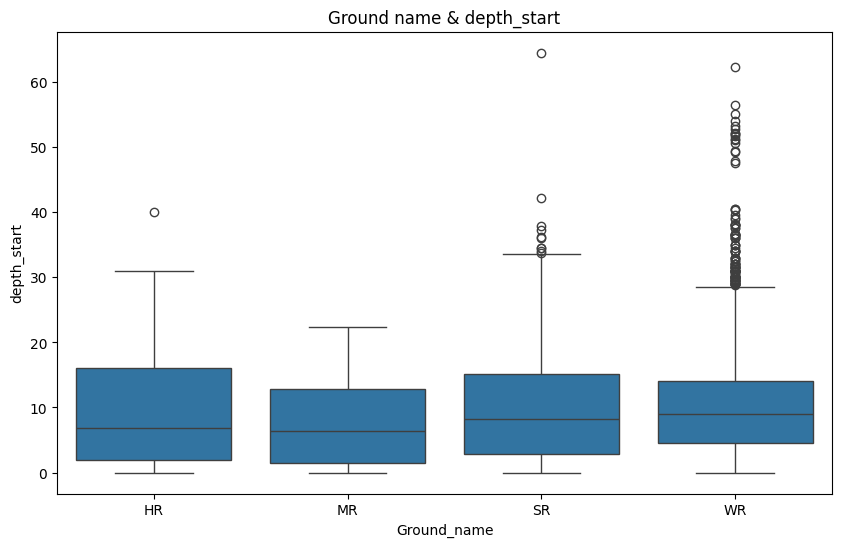

In [16]:
eda_utils.box_plot(df_v, 'Ground_name', 'depth_start', 'Ground name & depth_start')

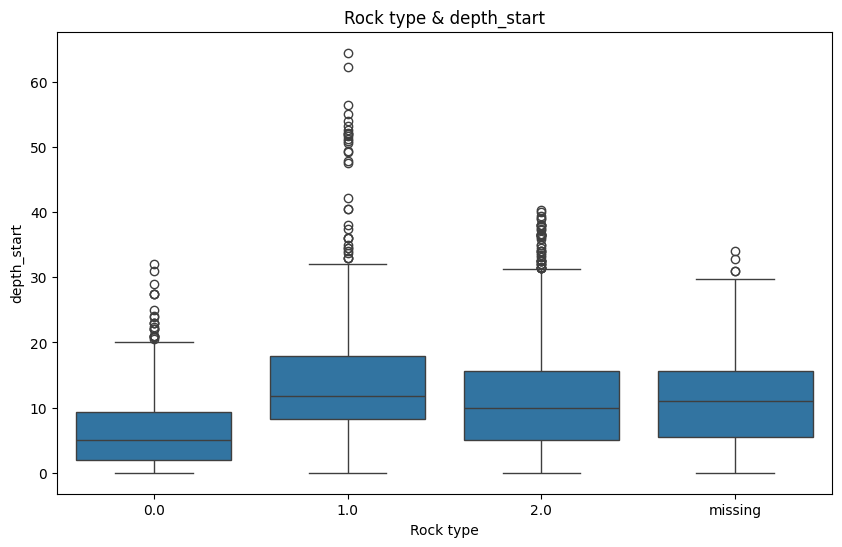

In [17]:
eda_utils.box_plot(df_v, 'Rock type', 'depth_start', 'Rock type & depth_start')

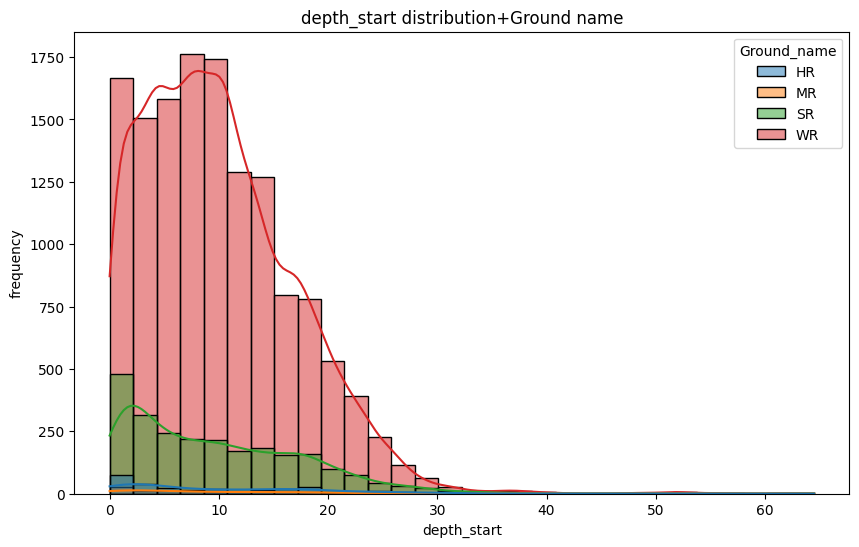

In [18]:
#elevation log scale distribution
eda_utils.distribution_histogram(df_v, 'depth_start', 'depth_start distribution+Ground name', 'Ground_name')

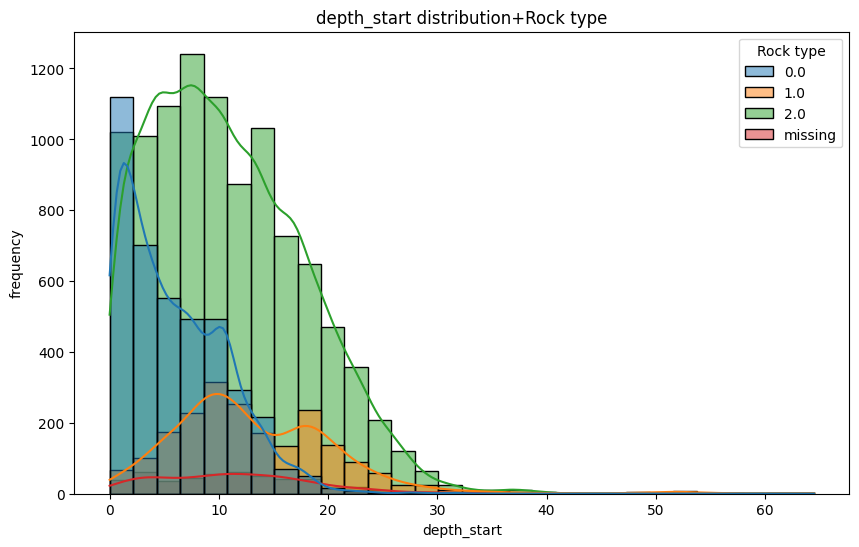

In [19]:
#elevation log scale distribution
eda_utils.distribution_histogram(df_v, 'depth_start', 'depth_start distribution+Rock type', 'Rock type')

## Data Clean

- rock type nan 값 가장 빈번한 값으로 fill
- ground_name string to int
- depth end, borehole_code 제거

In [20]:
# rock type nan 빈번한 값으로 처리
df['Rock type'] = df['Rock type'].replace('missing', 2)

# chagne type to categorical
df['Ground_name'] = df['Ground_name'].astype('category')
df['Rock type'] = df['Rock type'].astype('category')

# string to int
ground_name_map = {'WR':0, 'SR': 1, 'MR': 2, 'HR': 3}
df['Ground_name'] = df['Ground_name'].map(ground_name_map)

# delete
df.drop('depth_end', axis=1, inplace=True)
df.drop('borehole_code', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16603 entries, 0 to 16602
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   x            16603 non-null  float64 
 1   y            16603 non-null  float64 
 2   elevation    16603 non-null  float64 
 3   depth_start  16603 non-null  float64 
 4   Ground_name  16603 non-null  category
 5   Density      16603 non-null  float64 
 6   Slope        16603 non-null  float64 
 7   Aspect       16603 non-null  float64 
 8   DEM          16603 non-null  float64 
 9   Rock type    16603 non-null  category
dtypes: category(2), float64(8)
memory usage: 1.0 MB


C:\Users\user\AppData\Local\Temp\ipykernel_48340\1671861471.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Rock type'] = df['Rock type'].replace('missing', 2)
C:\Users\user\AppData\Local\Temp\ipykernel_48340\1671861471.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Rock type'] = df['Rock type'].replace('missing', 2)


## Data Split
- Train-Validation-Test: [8:1:1]
- density 범위에 따라 30개 그룹으로 나누고 각 그룹별로 8:1:1 로 random sampling

In [21]:
# replace

def density_norm(df):

    # normalize
    density_mean, density_std = df['Density'].mean(), df['Density'].std()
    df['Density'] = (df['Density']-density_mean)/density_std

    return df

In [22]:
df_s = density_norm(df)
df_s.head()

,x,y,elevation,depth_start,Ground_name,Density,Slope,Aspect,DEM,Rock type
0,198967.4821,554955.8072,130.24,0.8,0,-1.506112,-0.031206,36.430622,131.705551,0.0
1,202614.4382,549654.4904,16.20,10.5,1,0.350169,-0.179884,151.930878,13.754027,1.0
2,191084.5488,546103.7003,0.00,8.9,0,0.118857,0.003248,41.405895,11.238040,2.0
3,192941.7999,549274.3802,3.59,2.9,0,-0.953854,0.002738,164.089294,7.510272,1.0
4,197401.8257,551438.9232,27.40,2.5,0,0.280776,0.064212,242.313095,38.902401,0.0


In [23]:
# make bin
den_min = df_s['Density'].min()
den_max = df_s['Density'].max()

den_gap = (den_max-den_min)/30

df_s = df_s.reset_index()

df_s['den_bin'] = (df_s['Density']-den_min)//den_gap

print(df_s.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16603 entries, 0 to 16602
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   index        16603 non-null  int64   
 1   x            16603 non-null  float64 
 2   y            16603 non-null  float64 
 3   elevation    16603 non-null  float64 
 4   depth_start  16603 non-null  float64 
 5   Ground_name  16603 non-null  category
 6   Density      16603 non-null  float64 
 7   Slope        16603 non-null  float64 
 8   Aspect       16603 non-null  float64 
 9   DEM          16603 non-null  float64 
 10  Rock type    16603 non-null  category
 11  den_bin      16603 non-null  float64 
dtypes: category(2), float64(9), int64(1)
memory usage: 1.3 MB
None


In [24]:
df_s.groupby('den_bin').count()

,index,x,y,elevation,depth_start,Ground_name,Density,Slope,Aspect,DEM,Rock type
den_bin,,,,,,,,,,,
0.0,147,147,147,147,147,147,147,147,147,147,147
1.0,365,365,365,365,365,365,365,365,365,365,365
2.0,673,673,673,673,673,673,673,673,673,673,673
3.0,565,565,565,565,565,565,565,565,565,565,565
4.0,668,668,668,668,668,668,668,668,668,668,668
5.0,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287
6.0,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014
7.0,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161
8.0,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077


In [25]:
df_org_test = pd.DataFrame(columns=df_s.columns)

for i in range(0,31):
    num = int(df_s[df_s['den_bin'] == i].shape[0]*0.1)
    df_ot_i = (df_s[df_s['den_bin'] == i]).sample(n=num, random_state=1,replace=False)

    df_org_test = pd.concat([df_org_test, df_ot_i])

print(df_org_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1648 entries, 10137 to 3084
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   index        1648 non-null   object  
 1   x            1648 non-null   float64 
 2   y            1648 non-null   float64 
 3   elevation    1648 non-null   float64 
 4   depth_start  1648 non-null   float64 
 5   Ground_name  1648 non-null   category
 6   Density      1648 non-null   float64 
 7   Slope        1648 non-null   float64 
 8   Aspect       1648 non-null   float64 
 9   DEM          1648 non-null   float64 
 10  Rock type    1648 non-null   category
 11  den_bin      1648 non-null   float64 
dtypes: category(2), float64(9), object(1)
memory usage: 145.2+ KB
None


C:\Users\user\AppData\Local\Temp\ipykernel_48340\1573612550.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_org_test = pd.concat([df_org_test, df_ot_i])
C:\Users\user\AppData\Local\Temp\ipykernel_48340\1573612550.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_org_test = pd.concat([df_org_test, df_ot_i])
C:\Users\user\AppData\Local\Temp\ipykernel_48340\1573612550.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future ver

In [26]:
df_s = pd.merge(df_s, df_org_test, how='outer', indicator=True)
df_s = df_s.query('_merge == "left_only"').drop(columns=['_merge'])

print(df_s.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14955 entries, 0 to 16602
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   index        14955 non-null  object  
 1   x            14955 non-null  float64 
 2   y            14955 non-null  float64 
 3   elevation    14955 non-null  float64 
 4   depth_start  14955 non-null  float64 
 5   Ground_name  14955 non-null  category
 6   Density      14955 non-null  float64 
 7   Slope        14955 non-null  float64 
 8   Aspect       14955 non-null  float64 
 9   DEM          14955 non-null  float64 
 10  Rock type    14955 non-null  category
 11  den_bin      14955 non-null  float64 
dtypes: category(2), float64(9), object(1)
memory usage: 1.3+ MB
None


In [27]:
df_org_val = pd.DataFrame(columns=df_s.columns)

for i in range(0,31):
    num = int(df_s[df_s['den_bin'] == i].shape[0]*(1/9))
    df_ov_i = (df_s[df_s['den_bin'] == i]).sample(n=num, random_state=1, replace=False)

    df_org_val = pd.concat([df_org_val, df_ov_i])

print(df_org_val.info())

C:\Users\user\AppData\Local\Temp\ipykernel_48340\256438044.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_org_val = pd.concat([df_org_val, df_ov_i])
C:\Users\user\AppData\Local\Temp\ipykernel_48340\256438044.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_org_val = pd.concat([df_org_val, df_ov_i])
C:\Users\user\AppData\Local\Temp\ipykernel_48340\256438044.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, t

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 7982 to 11564
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   index        1649 non-null   object  
 1   x            1649 non-null   float64 
 2   y            1649 non-null   float64 
 3   elevation    1649 non-null   float64 
 4   depth_start  1649 non-null   float64 
 5   Ground_name  1649 non-null   category
 6   Density      1649 non-null   float64 
 7   Slope        1649 non-null   float64 
 8   Aspect       1649 non-null   float64 
 9   DEM          1649 non-null   float64 
 10  Rock type    1649 non-null   category
 11  den_bin      1649 non-null   float64 
dtypes: category(2), float64(9), object(1)
memory usage: 145.3+ KB
None


In [28]:
df_org_train = pd.merge(df_s, df_org_val, how='outer', indicator=True)
df_org_train = df_org_train.query('_merge == "left_only"').drop(columns=['_merge'])

print(df_org_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13306 entries, 0 to 14954
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   index        13306 non-null  object  
 1   x            13306 non-null  float64 
 2   y            13306 non-null  float64 
 3   elevation    13306 non-null  float64 
 4   depth_start  13306 non-null  float64 
 5   Ground_name  13306 non-null  category
 6   Density      13306 non-null  float64 
 7   Slope        13306 non-null  float64 
 8   Aspect       13306 non-null  float64 
 9   DEM          13306 non-null  float64 
 10  Rock type    13306 non-null  category
 11  den_bin      13306 non-null  float64 
dtypes: category(2), float64(9), object(1)
memory usage: 1.1+ MB
None


In [29]:
df_org_train = df_org_train.drop(['index', 'den_bin', 'Density'],axis=1)
df_org_val = df_org_val.drop(['index', 'den_bin', 'Density'],axis=1)
df_org_test = df_org_test.drop(['index', 'den_bin', 'Density'],axis=1)

In [30]:
df_org_train.to_csv('data/241001_Rockhead_Seoul_train(before_aumentation).csv', index=False)
df_org_val.to_csv('data/241001_Rockhead_Seoul_val(before_aumentation).csv', index=False)
df_org_test.to_csv('data/241001_Rockhead_Seoul_test(before_aumentation).csv', index=False)